# Introduction

This is our project for the CP 321 final assignment. We are working on the dataset that is providing the information about the Human-wildlife coexistence incidents managed by Parks Canada. The dataset is taken from the website of government of Canada. The website link is

https://open.canada.ca/data/en/dataset/743a0b4a-9e33-4b12-981a-9f9fd3dd1680

Jay Vora - 203321900 vora1900@mylaurier.ca

Harsh Solanki - 190718710 sola8710@mylaurier.ca


# Motivation

One similarity that we have in common is that we enjoy hiking in nature. Hiking in nature provides an opportunity to disconnect from the noise and distractions of daily life and to connect with the natural world. Being in nature can be calming and restorative, helping to reduce stress and anxiety. Hiking can also provide a sense of accomplishment and a feeling of being connected to something larger than oneself. However, we may encounter somes problem while we are hiking such a wildlife encounter which may result in an individual getting injured or worse case even death. Therefore, we wanted to educate ourself and others by answering the questions below. 

The question we are trying to answer is

1. What is the most common type of human-wildlife coexistence incident reported across all parks and historic sites?

2. How has the number of hwc incidents changed over time from 2010 to 2021?

3. Which national park or historic site has the highest number of human-wildlife coexistence incidents reported? And lowest 

4. Are there any seasonal or geographic trends in the occurrence of human-wildlife coexistence incidents?

5. What is the average response time by Parks Canada staff to human-wildlife coexistence incidents?

In [32]:
#all the imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt


#reading the csv fille
df = pd.read_csv('data/pca-human-wildlife-coexistence-incidents-detailed-records-2010-2021.csv')


# Question 1 - What is the most common type of human-wildlife coexistence incident reported across all parks and historic sites?
Answering the first question and to identify the most common type of human-wildlife coexistence incident reported across all parks and historic sites, the data set was grouped by the type of incident, and the count of incidents was calculated for each incident type. The resulting data was then sorted in descending order to determine the most common type of incident reported.

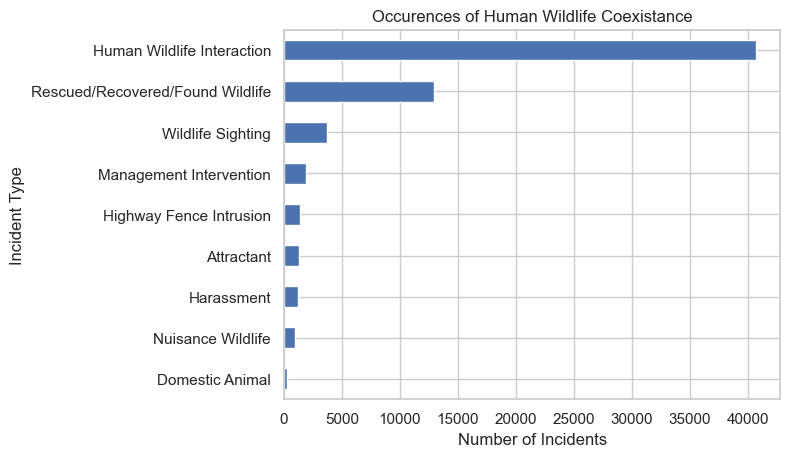

In [15]:

incident_type = df['Incident Type'].value_counts().sort_values(ascending=True)

incident_type.plot.barh()
# We will use bar plot to show which Incidents have the highest reporting and which has the lowest
plt.title('Occurences of Human Wildlife Coexistance')
plt.xlabel('Number of Incidents')
plt.ylabel('Incident Type')
plt.show()

The following bar graphs shows us the number of times each incident has occurred. Through our result we can see that Human Wildlife Interaction occured the most and Domestic Animal's incident occured the least. This is quiet obvious since most interaction in an national park would be with wildlife species such as elk, moose, grizzly bear and many more species and domestic animals would be farmland not in the wildlife.

# Question 2 - How has the number of hwc incidents changed over time from 2010 to 2021?
To identify the changes in the number of human-wildlife coexistence incidents reported over time, the data set was grouped by year, and the count of incidents was calculated for each year. The resulting data was then plotted on a line chart to visualize the trends and changes in the number of incidents reported over time.

C:\Users\jayvo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\jayvo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\jayvo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-01-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\jayvo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-01-2010' in DD/MM/YYYY format. Provide format or specif

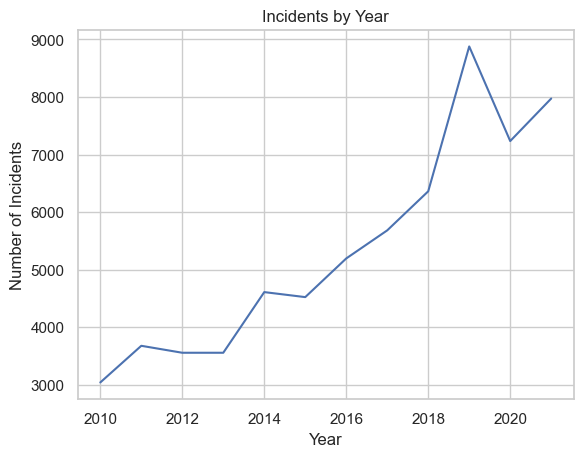

In [16]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

# Group the data by year and count the number of incidents in each year
incidents_year = df.groupby(df['Incident Date'].dt.year)['Incident Number'].count()

# Plot the time series
plt.plot(incidents_year.index, incidents_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Incidents by Year')
plt.show()

The time series graph above displays the relationship between the number of incidents between the year 2010 to 2021. In this graph we can that see that between 2010 to 2019 each year the number of incidents have increased until 2019 when COVID-19 occured when the national parks were closed due to the lockdown. However, after 2020 the number of incident increased due to the lockdown being lifted and more vistor visting the national parks.

# Question 3 - Which national park or historic site has the highest number of human-wildlife coexistence incidents reported? 
- To identify the site with the highest number of human-wildlife coexistence incidents reported, the data set was grouped by protected heritage area, and the count of incidents was calculated for each site. The resulting data was then plotted on a horizontal bar chart to visualize the number of incidents reported for each site.

- This information can be used to better understand the potential risks associated with visiting these parks and take appropriate measures to minimize them. 


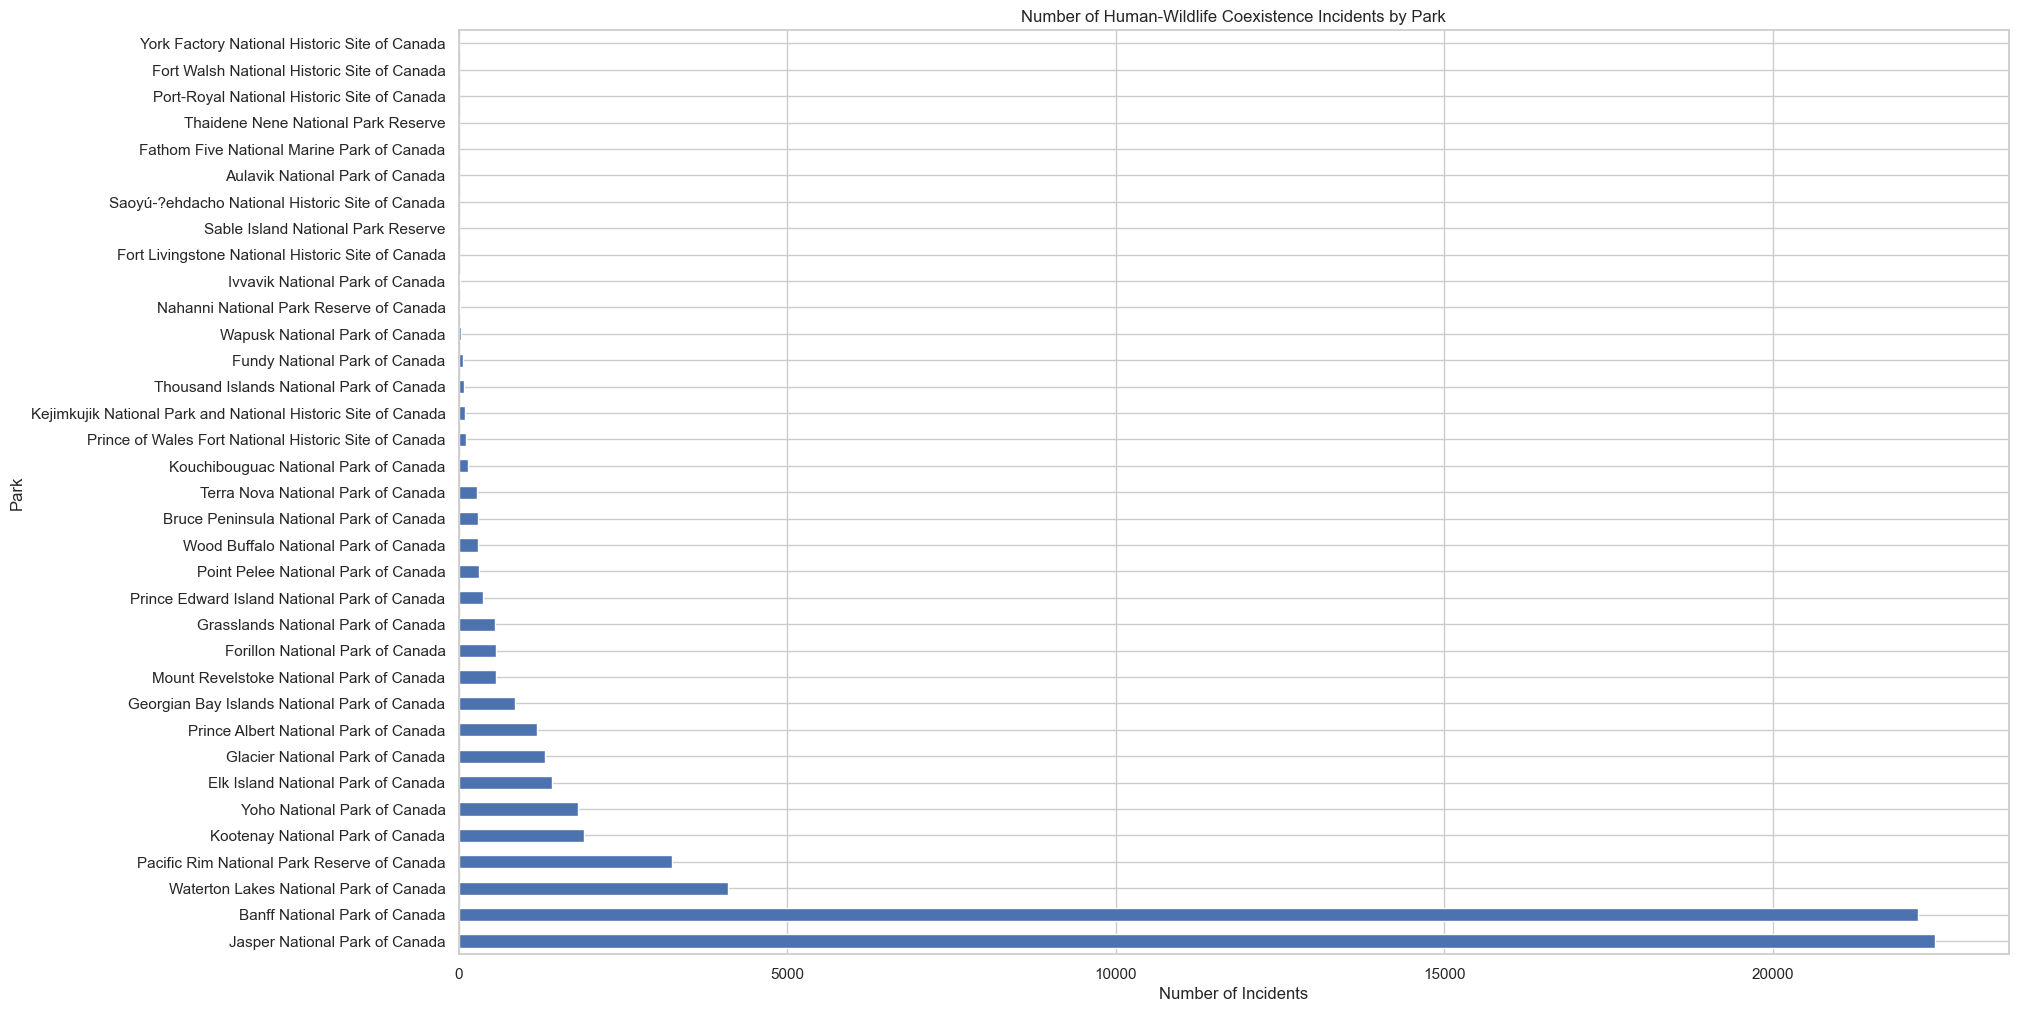

In [17]:
#grouping the dataset by Park names and the Incident Number and counting the occurence of the Park names 
park_counts = df.groupby("Protected Heritage Area", sort = True)["Incident Number"].count()
# Sort the parks by the number of incidents in descending order
park_counts_sorted = park_counts.sort_values(ascending=False)
plt.figure(figsize=(20, 12))
park_counts_sorted.plot(kind="barh")
plt.title("Number of Human-Wildlife Coexistence Incidents by Park")
plt.xlabel("Number of Incidents")
plt.ylabel("Park")
plt.show()

The bar graph shows us that Jasper National Park and Banff National Park as the highest number of human-wildlife incident. This is because both these nationals park are the largest parks in Canada is usually countered a lot of visitors which also means that most incidents will happen in these parks.

# Question4 - Are there any seasonal or geographic trends in the occurrence of human-wildlife coexistence incidents?
This information and heatmap clearly shows that during the summer time (Month 5 to 7) in Jasper National Park of Canada and Banff National Park of Cananda had the most significant number of incidents as that is when most of the people go out to parks and the more people, the more chances to have incidents.

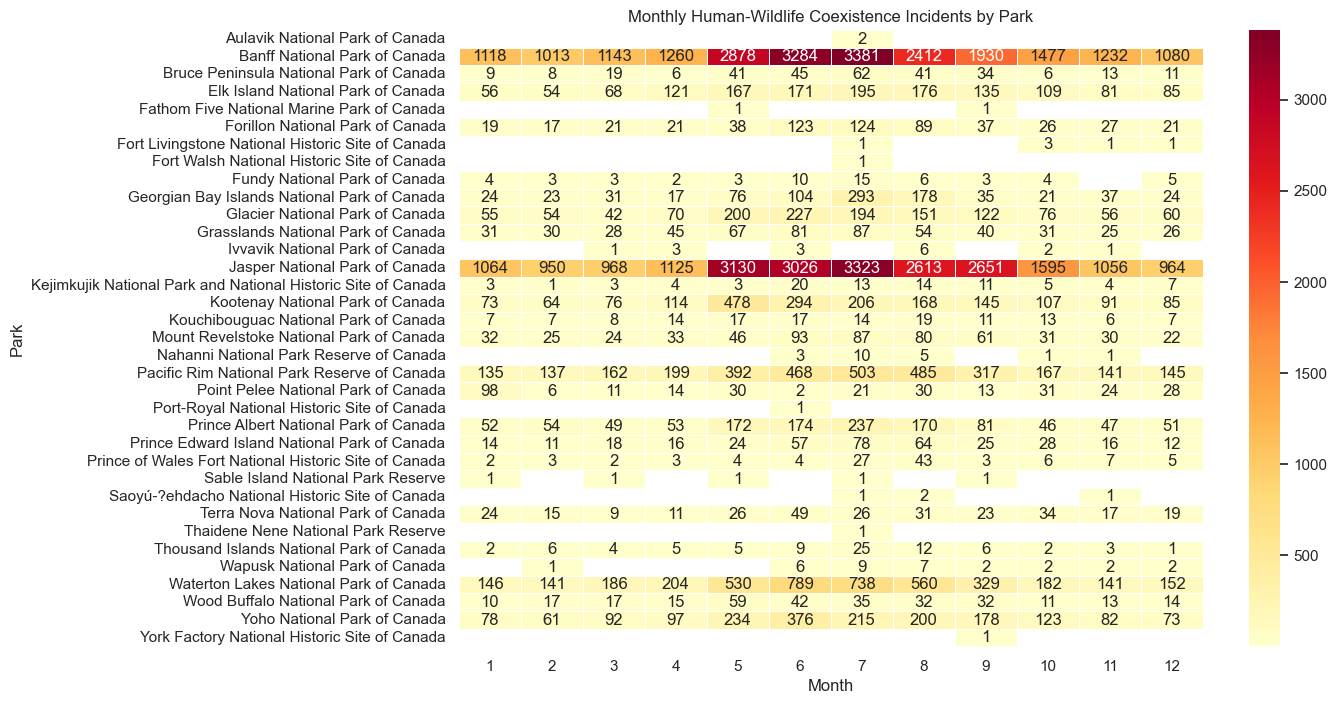

In [18]:
df["Incident date"] = pd.to_datetime(df["Incident Date"])

#sorting the date by month and year
df["Month"] = df["Incident date"].dt.month
df["Year"] = df["Incident date"].dt.year

# Group the data in the DataFrame by "Month" and "Protected Heritage Area" columns
# Count the number of incidents in each group based on the "Incident Number" column
monthly_counts = df.groupby(["Month", "Protected Heritage Area"])["Incident Number"].count().reset_index()

# Set the style of the Seaborn plots to "whitegrid"
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_counts.pivot("Protected Heritage Area", "Month", "Incident Number"), cmap="YlOrRd", annot=True, fmt=".0f", linewidths=.5)
#set the title and axis and plot it
plt.title("Monthly Human-Wildlife Coexistence Incidents by Park")
plt.xlabel("Month")
plt.ylabel("Park")
plt.show()

The heat map shows us whether any seasonal or geographic trends in the occurrence of human-wildlife coexistence incidents. Through our results we found that during the month of May, June, July, August, September there were the most number of incidents. We notice that most incidents happens during the summer months when the weather is hot and you see more tourist visiting the national parks.

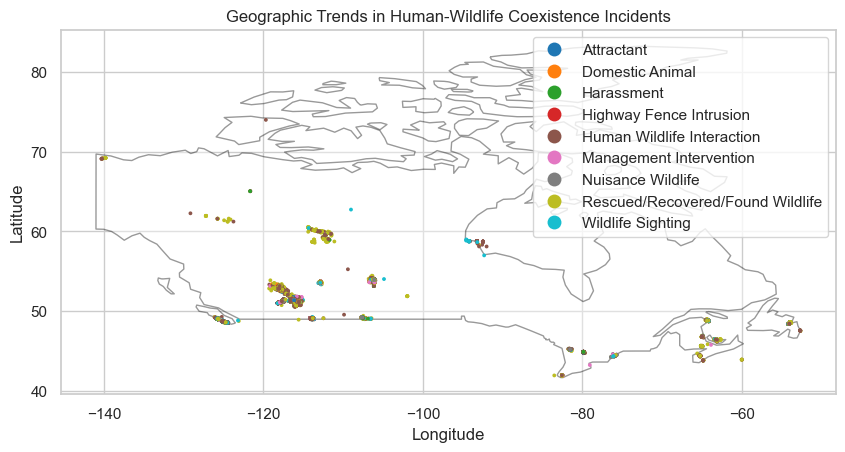

In [36]:
# Remove any rows with missing longitude or latitude values
df = df.dropna(subset=['Longitude Public', 'Latitude Public'])

# Convert the longitude and latitude to a geopandas GeoDataFrame
geometry = gpd.points_from_xy(df['Longitude Public'], df['Latitude Public'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Create a basemap of Canada
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
canada = world[world.name == 'Canada']

# Plot the incidents on the basemap
fig, ax = plt.subplots(figsize=(10, 10))
canada.plot(ax=ax, alpha=0.4, color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=3, column='Incident Type', legend=True)

# Customize the plot
plt.title('Geographic Trends in Human-Wildlife Coexistence Incidents')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()




# Question5 - What is the average response time by Parks Canada staff to human-wildlife coexistence incidents?

C:\Users\jayvo\AppData\Local\Temp\ipykernel_9412\1923607776.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby('Protected Heritage Area')['Response Time (s)', 'Total Staff Hours'].mean()


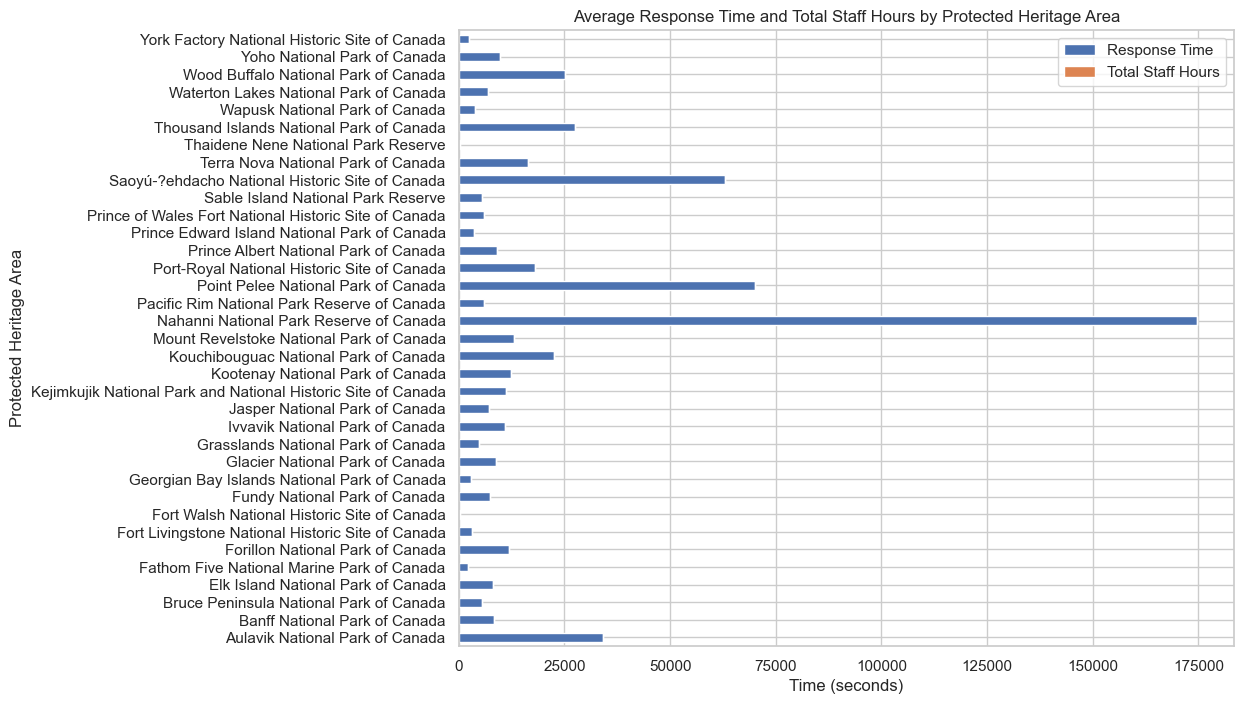

In [31]:
df["Total Staff Hours"] = pd.to_numeric(df["Total Staff Hours"], errors="coerce")
df["Response Time"] = df["Total Staff Hours"] * 3600

response_times = df.groupby("Protected Heritage Area")["Response Time"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(response_times.index, response_times.values)
plt.title("Average Response Time by Park")
plt.xlabel("Response Time (hours)")
plt.ylabel("Park")
plt.show()
#------------------------------------------------

# Remove any rows with missing data
df = df.dropna(subset=['Protected Heritage Area', 'Total Staff Hours'])

# Convert staff hours to response time in seconds
df['Response Time (s)'] = df['Total Staff Hours'] * 3600

# Group by protected heritage area and calculate mean response time and total staff hours
grouped = df.groupby('Protected Heritage Area')['Response Time (s)', 'Total Staff Hours'].mean()

# Plot a horizontal stacked bar chart
grouped.plot.barh(stacked=True, figsize=(10, 8))

# Add labels and title
plt.title('Average Response Time and Total Staff Hours by Protected Heritage Area')
plt.xlabel('Time (seconds)')
plt.ylabel('Protected Heritage Area')
plt.legend(['Response Time', 'Total Staff Hours'])
plt.show()



The bar graph shows us how long an average response time for reach national park is. Through our finding we found that Fort Walsh National Historic Site of Canada and Thaidene Nene National Park Reserve have the shortest response time and Nanhanni National Park Reserve of Canada has the longer response time.

# Conclusion

From the dataset processing and analyzing all the information we shown the types of incidents, incidents throughout the years, where most incidents occurs, the relationship between the weather and incidents, and the help they can get. Now that summer has began and more and more people will start going to one of these nationals park we want to make that they go with proper cautions about any incidents and the help they can receive this way they and there loved ones can have a safe and a joyful hike.